# Passive degrees of freedom



Passive dofs!

In [1]:
from blop.utils import prepare_re_env

%run -i $prepare_re_env.__file__ --db-type=temp

running iteration 1 / 1


Transient Scan ID: 1     Time: 2024-02-03 16:45:09
Persistent Unique Scan ID: '277af9d5-3991-482d-8596-2567f51fe819'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian1 |         x3 |  brownian2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 16:45:09.6 |      1.498 |      0.364 |      0.001 |      0.000 |      0.041 |


|         2 | 16:45:10.2 |      0.834 |     -1.058 |     -0.006 |      0.000 |      0.326 |


|         3 | 16:45:10.6 |      2.618 |     -2.496 |     -0.079 |      0.000 |      0.299 |


|         4 | 16:45:11.1 |      4.322 |     -4.832 |     -0.249 |      0.000 |      0.356 |


|         5 | 16:45:11.5 |      2.226 |     -3.721 |     -0.351 |      0.000 |      0.443 |


|         6 | 16:45:12.0 |     -0.517 |     -3.930 |     -0.271 |      0.000 |      0.446 |


|         7 | 16:45:12.4 |     -1.274 |     -1.282 |     -0.171 |      0.000 |      0.580 |


|         8 | 16:45:12.9 |     -3.569 |     -2.516 |     -0.200 |      0.000 |      0.105 |


|         9 | 16:45:13.3 |     -4.640 |     -0.166 |     -0.270 |      0.000 |     -0.078 |


|        10 | 16:45:13.7 |     -2.726 |      0.879 |     -0.269 |      0.000 |     -0.286 |


|        11 | 16:45:14.2 |     -4.079 |      3.209 |      0.230 |      0.000 |     -0.541 |


|        12 | 16:45:14.6 |     -2.430 |      4.643 |      0.150 |      0.000 |     -0.849 |


|        13 | 16:45:15.0 |     -0.765 |      1.975 |      0.267 |      0.000 |     -0.911 |


|        14 | 16:45:15.5 |      0.467 |      3.008 |      0.083 |      0.000 |     -1.167 |


|        15 | 16:45:15.9 |      3.659 |      4.138 |      0.188 |      0.000 |     -1.029 |


|        16 | 16:45:16.4 |      4.377 |      1.783 |      0.271 |      0.000 |     -0.949 |


+-----------+------------+------------+------------+------------+------------+------------+
generator list_scan ['277af9d5'] (scan num: 1)


/usr/share/miniconda3/envs/blop-py3.10/lib/python3.10/site-packages/bluesky/callbacks/fitting.py:167: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(input * grids[dir].astype(float), labels, index) / normalizer





trained model 'himmelblau' in 47 ms


('277af9d5-3991-482d-8596-2567f51fe819',)

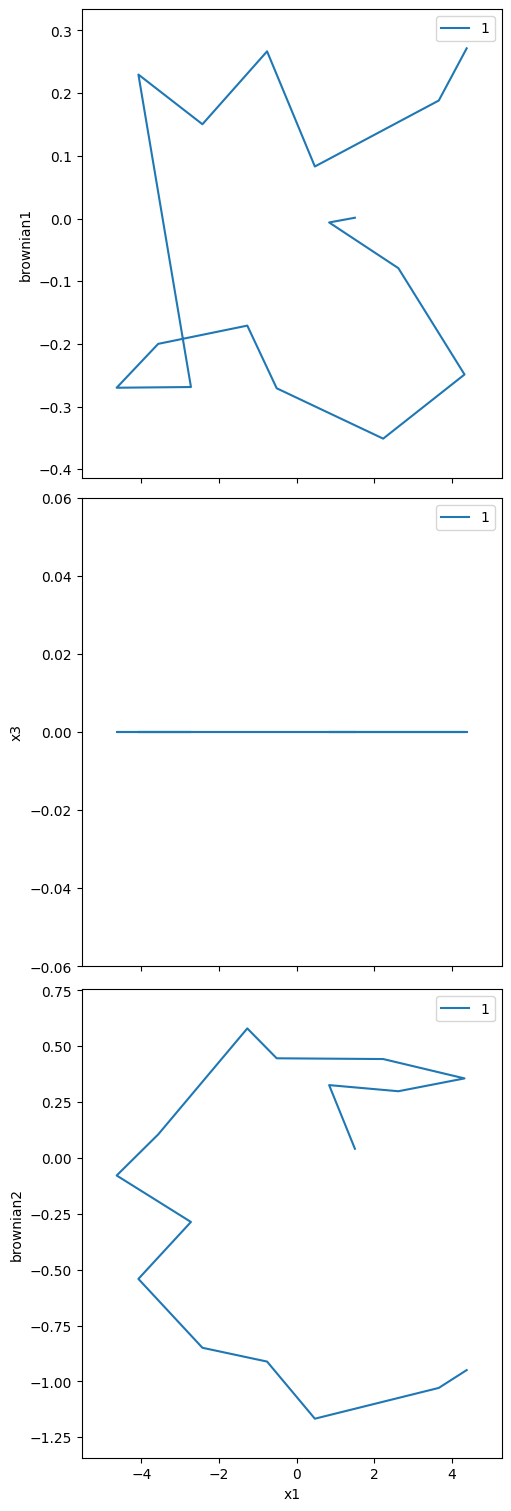

In [2]:
from blop.utils import functions
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_bounds=(-5.0, 5.0)),
    DOF(name="x2", search_bounds=(-5.0, 5.0)),
    DOF(name="x3", search_bounds=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=functions.constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

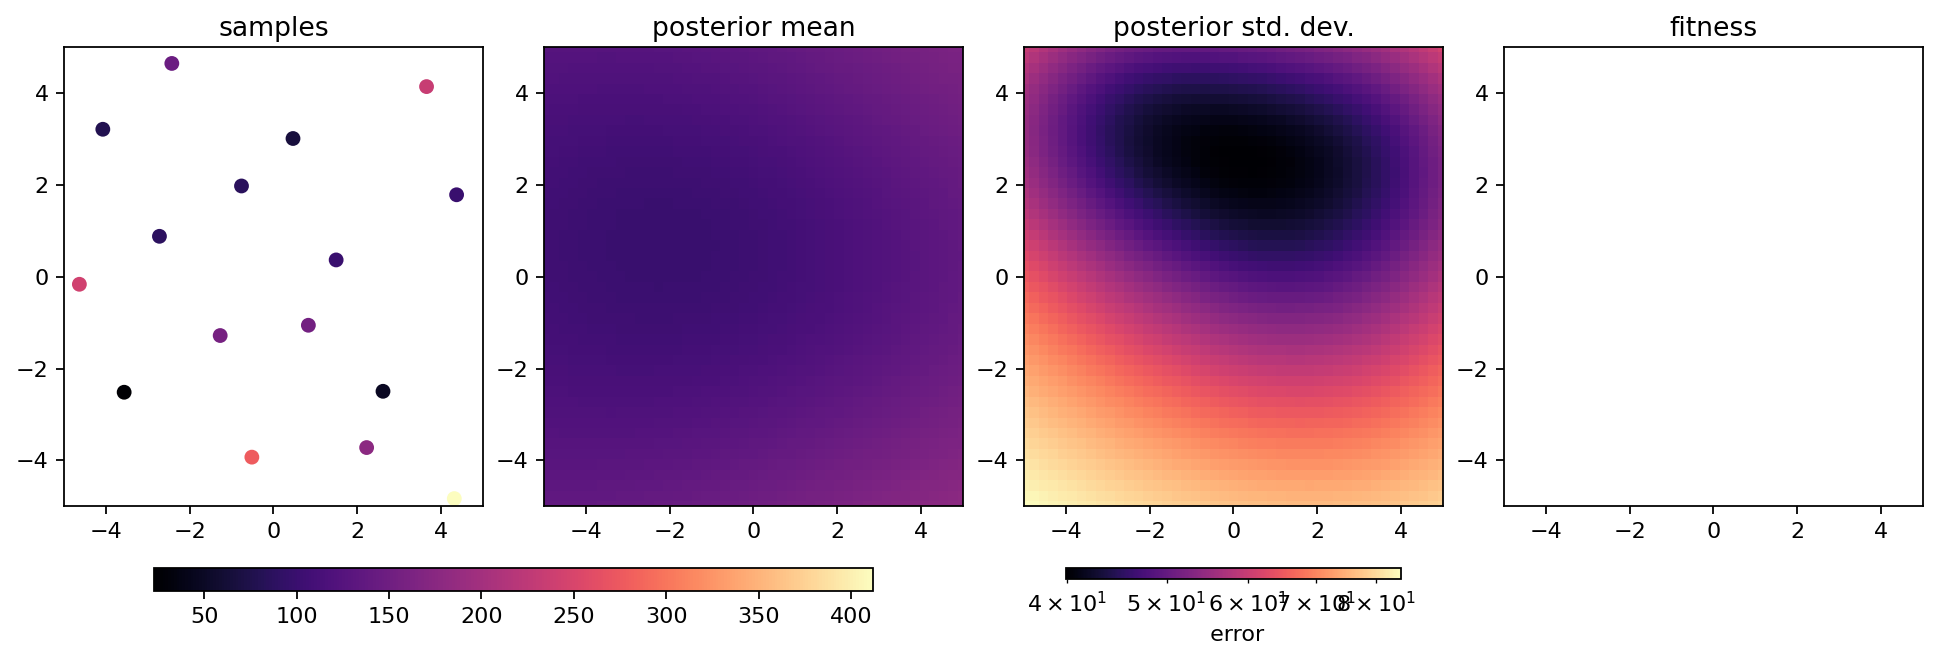

In [3]:
agent.plot_objectives()